# Churn Prediction
### Problem statement
Use a dataset of customer information and
build a model that can predict which
customers are most likely to leave a company

### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                    
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
data = pd.read_csv("churn.csv")
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
columns=["gender","SeniorCitizen","Partner","Dependents","MultipleLines","PhoneService","InternetService","OnlineSecurity","OnlineBackup",
        "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]

In [7]:
data.drop(columns=['customerID'], inplace=True) #drop un-necessary columns

In [8]:
data.shape

(7043, 20)

In [9]:
data.drop_duplicates(inplace = True) #drop duplicates
data.shape

(7021, 20)

### Univariate analysis

In [10]:
for i in columns:
    print(i)
    print(data[i].unique())
    print("\n")

gender
['Female' 'Male']


SeniorCitizen
[0 1]


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


PhoneService
['No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes']




In [11]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7010.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2266.820832
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
data['TotalCharges'].describe()

count    7010.000000
mean     2290.353388
std      2266.820832
min        18.800000
25%       408.312500
50%      1403.875000
75%      3807.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [15]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(2290)

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.352834
std,0.368947,24.534965,30.069001,2265.044136
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


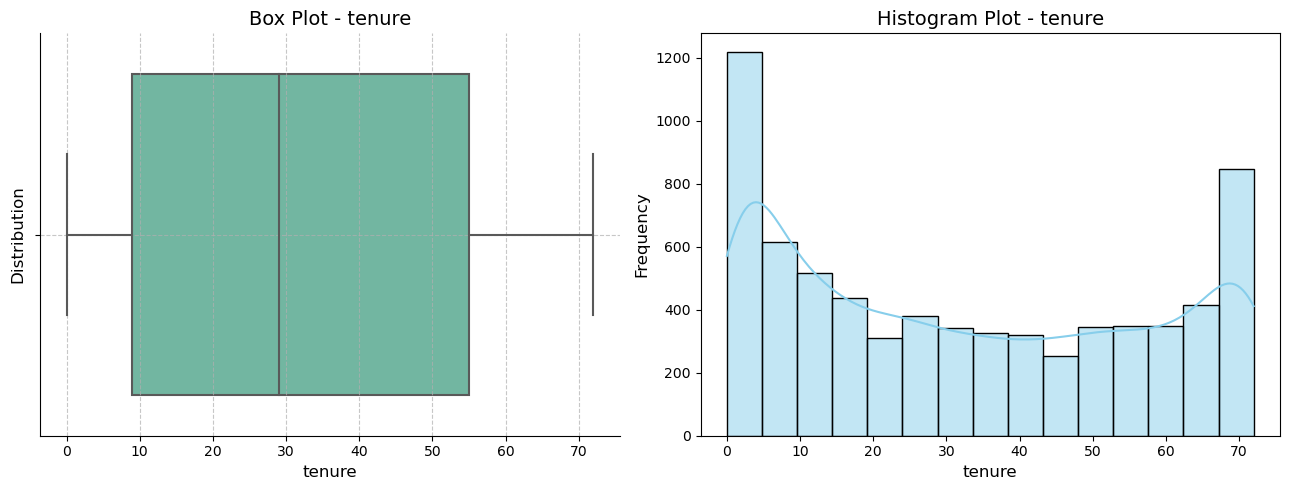

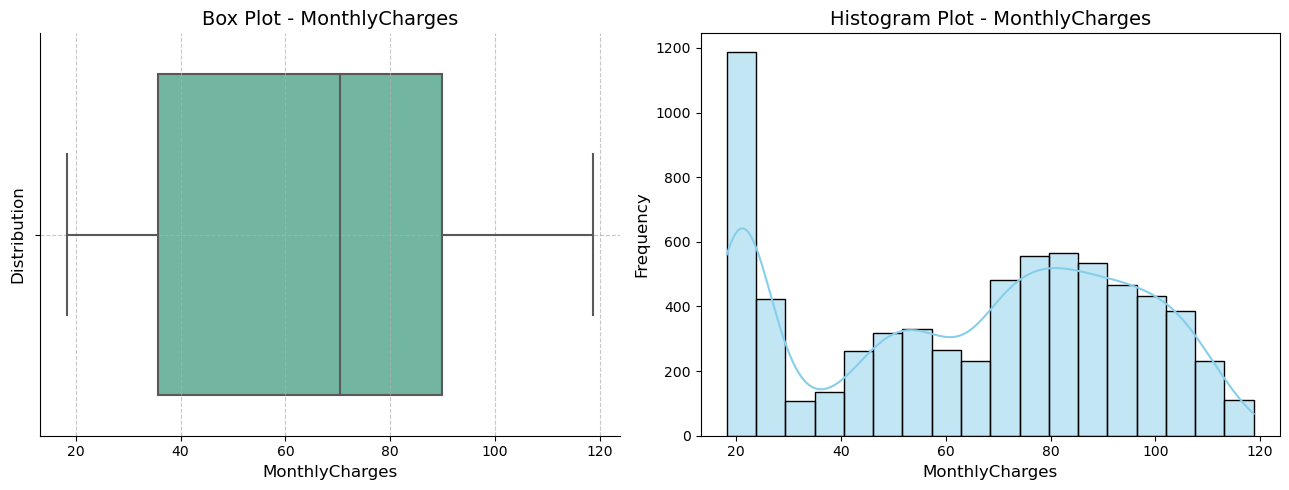

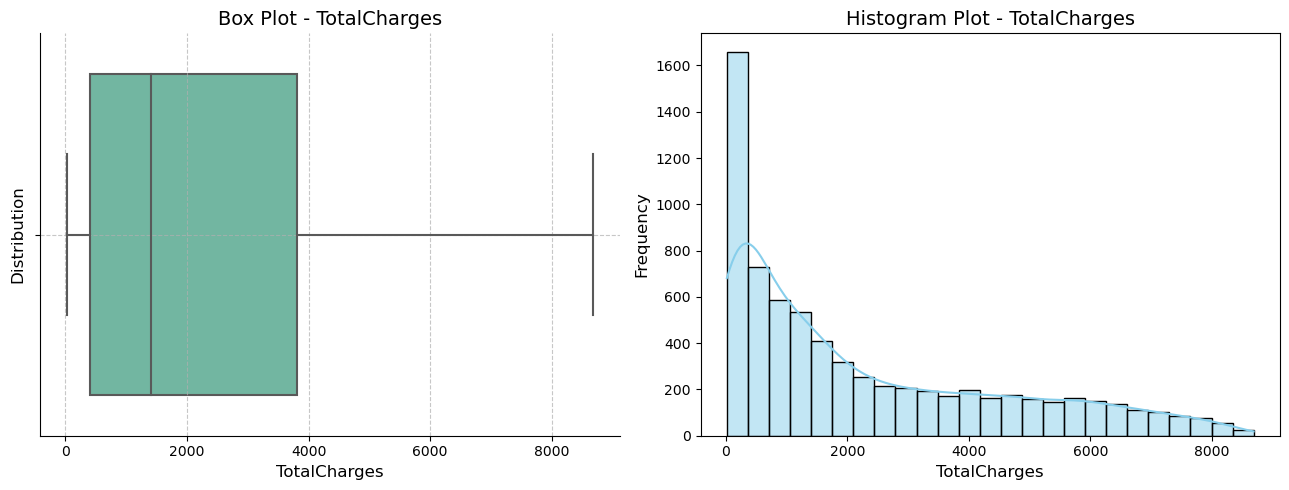

In [17]:
col=["tenure","MonthlyCharges","TotalCharges"]
for each in col:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    # Box Plot 
    sns.boxplot(x=each, data=data, ax=ax1, palette="Set2")
    ax1.set_xlabel(each, fontsize=12)  
    ax1.set_ylabel("Distribution", fontsize=12)  
    ax1.set_title(f"Box Plot - {each}", fontsize=14)  
    ax1.tick_params(labelsize=10)

    # Customize the appearance of the Box plot
    sns.despine(ax=ax1) 
    ax1.grid(True, linestyle='--', alpha=0.7) 

    # Histogram
    sns.histplot(data=data, x=each, kde=True, ax=ax2, color="skyblue") 
    ax2.set_xlabel(each, fontsize=12)
    ax2.set_ylabel("Frequency", fontsize=12)  
    ax2.set_title(f"Histogram Plot - {each}", fontsize=14)
    ax2.tick_params(labelsize=10)

    # Adjust layout for better spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

### Label encoding

In [18]:
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
data['Churn']=data['Churn'].map({'Yes':0,'No':1})
data['PaymentMethod']=data['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
data['PaperlessBilling']=data['PaperlessBilling'].map({'Yes':0,'No':1})
data['Contract']=data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
data['StreamingMovies']=data['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})
data['Partner'] = data['Partner'].map({'Yes': 0, 'No': 1})
data['Dependents'] = data['Dependents'].map({'No': 0, 'Yes': 1})
data['MultipleLines'] = data['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
data['PhoneService'] = data['PhoneService'].map({'No': 0, 'Yes': 1})
data['InternetService'] = data['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 0, 'No': 1, 'No internet service': 2})
data['DeviceProtection'] = data['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['TechSupport'] = data['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['StreamingTV'] = data['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})


In [19]:
for i in columns:
    print(i)
    print(data[i].unique())
    print("\n")

gender
[0 1]


SeniorCitizen
[0 1]


Partner
[0 1]


Dependents
[0 1]


MultipleLines
[0 1 2]


PhoneService
[0 1]


InternetService
[0 1 2]


OnlineSecurity
[0 1 2]


OnlineBackup
[0 1 2]


DeviceProtection
[0 1 2]


TechSupport
[0 1 2]


StreamingTV
[0 1 2]


StreamingMovies
[0 1 2]


Contract
[0 1 2]


PaperlessBilling
[0 1]


PaymentMethod
[0 1 2 3]


Churn
[1 0]




### One Hot Encoding

In [20]:
data1 = pd.read_csv('churn.csv') 
dataOneHotEn = pd.get_dummies(data1, drop_first = True)
dataOneHotEn.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

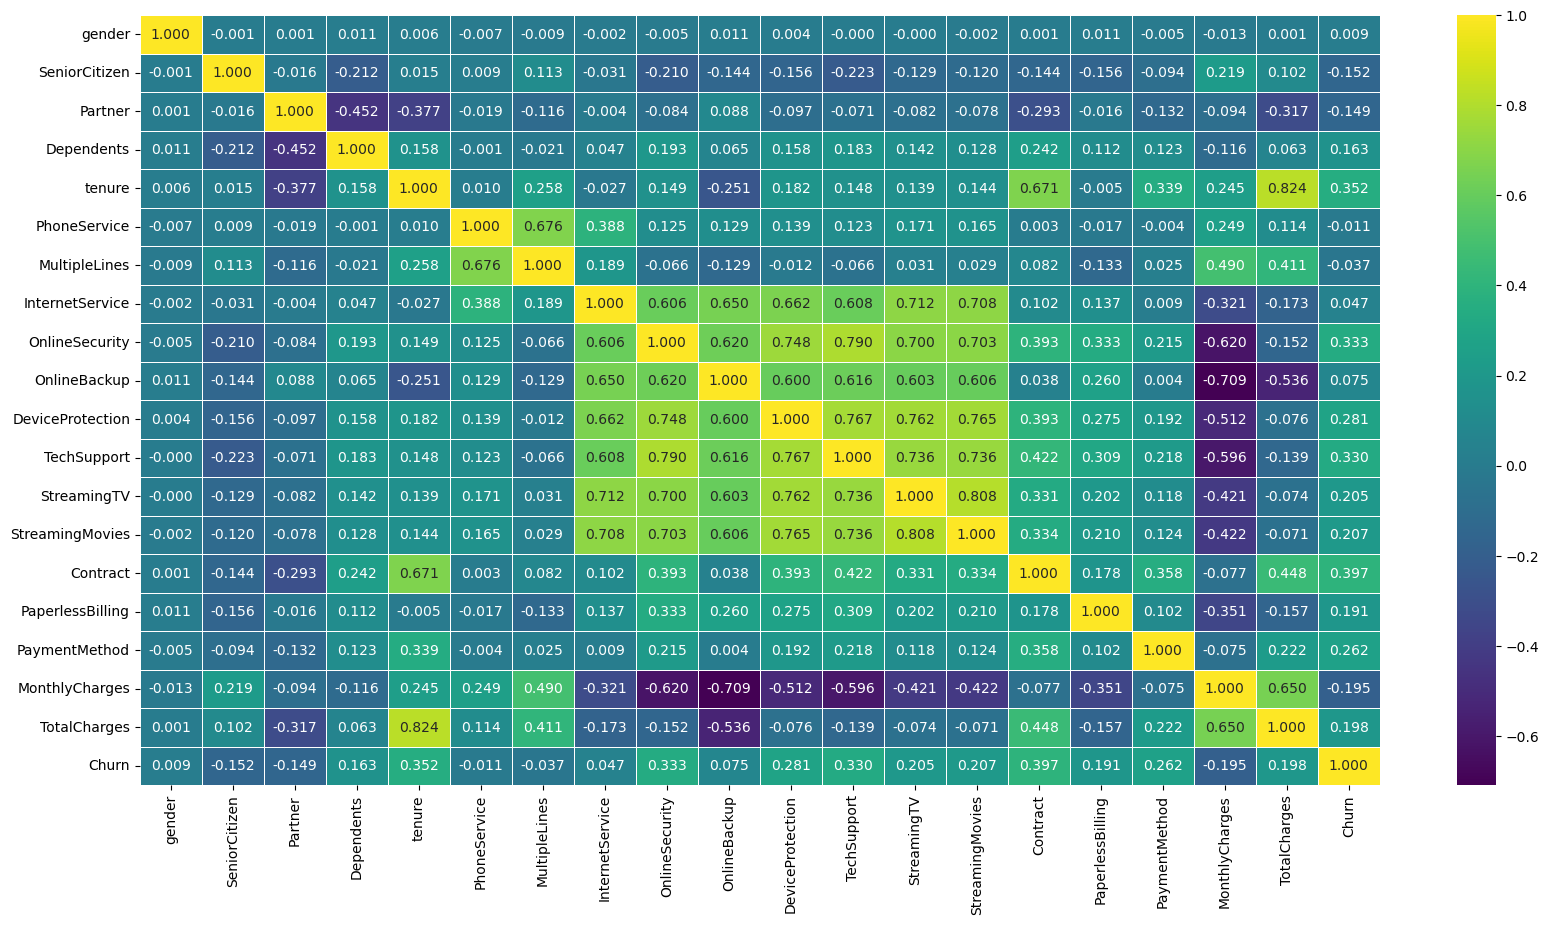

In [21]:
plt.figure(figsize = (20,10)) 
sns.heatmap(data.corr(),
           annot = True,
           linewidth = .5,
           cmap = "viridis",
           fmt='.3f')

### Balancing and Normalising data

In [22]:
from scipy.stats import zscore
datascaled = data.apply(zscore)
datascaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.008726,-0.440508,-1.031400,-0.655475,-1.282728,-3.048725,-2.060855,-1.181531,-0.902747,-1.178456,-0.997480,-0.908347,-1.071178,-1.077955,-0.830396,-0.829057,-1.145750,-1.164135,-0.998066,0.599671
1,0.991349,-0.440508,0.969556,-0.655475,0.062387,0.328006,-0.506691,-1.181531,0.354082,0.177039,0.288474,-0.908347,-1.071178,-1.077955,0.368496,1.206190,-0.276095,-0.262811,-0.176986,0.599671
2,0.991349,-0.440508,0.969556,-0.655475,-1.241967,0.328006,-0.506691,-1.181531,0.354082,-1.178456,-0.997480,-0.908347,-1.071178,-1.077955,-0.830396,-0.829057,-0.276095,-0.365914,-0.963495,-1.667582
3,0.991349,-0.440508,0.969556,-0.655475,0.510759,-3.048725,-2.060855,-1.181531,0.354082,0.177039,0.288474,0.350040,-1.071178,-1.077955,0.368496,1.206190,0.593561,-0.750058,-0.198510,0.599671
4,-1.008726,-0.440508,0.969556,-0.655475,-1.241967,0.328006,-0.506691,0.175278,-0.902747,0.177039,-0.997480,-0.908347,-1.071178,-1.077955,-0.830396,-0.829057,-1.145750,0.194503,-0.944289,-1.667582


In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8)

In [24]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [25]:
XNew, yNew = sm.fit_resample(X,y)

<Axes: >

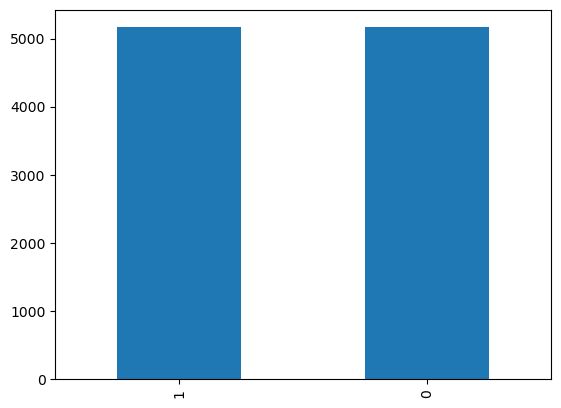

In [26]:
pd.Series(yNew).value_counts().plot(kind='bar')


### Splitting Dataset into test_set and train_set 

In [27]:
from sklearn.model_selection import train_test_split # Split into training and test set

XTrain, XTest, YTrain, YTest = train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size = .3,
                                               random_state = 8)
XTrain.shape, XTest.shape

((4914, 19), (2107, 19))

### Fitting data into Model

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
GNBModel = gnb.fit(XTrain, YTrain)

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

TrSGNBPred = GNBModel.predict(XTrain)
TeSGNBPred = GNBModel.predict(XTest)
TrSAccGNB = accuracy_score(YTrain, TrSGNBPred)
TeSAccGNB = accuracy_score(YTest, TeSGNBPred)
TeSRecGNB = recall_score(YTest, TeSGNBPred)
TeSPreGNB = precision_score(YTest, TeSGNBPred)

TempResultsDf = pd.DataFrame({'Method': ['Gaussian NB'],
                              'TrainingAccuracy': [TrSAccGNB],
                              'TestAccuracy': TeSAccGNB,
                              'TestRecall': TeSRecGNB,
                              'TestPrecision': TeSPreGNB})

ResultsDf = TempResultsDf
print(ResultsDf)

        Method  TrainingAccuracy  TestAccuracy  TestRecall  TestPrecision
0  Gaussian NB          0.706146      0.719506    0.681641       0.911227
